In [1]:
import pandas as pd

In [3]:
df = pd.read_parquet('../data/NY_hospitals_beds_final_df.parquet')
df.head()

Facility County  \
Facility Name              As of Date                   
A.O. FOX MEMORIAL HOSPITAL 2020-03-26          OTSEGO   
                           2020-03-27          OTSEGO   
                           2020-03-28          OTSEGO   
                           2020-03-29          OTSEGO   
                           2020-03-30          OTSEGO   

                                       Patients Age 55 to 64 Years  \
Facility Name              As of Date                                
A.O. FOX MEMORIAL HOSPITAL 2020-03-26                          0.0   
                           2020-03-27                          0.0   
                           2020-03-28                          0.0   
                           2020-03-29                          0.0   
                           2020-03-30                          0.0   

                                       Patients Age 65 to 74 Years  \
Facility Name              As of Date                                
A.O. FOX MEMORIAL HOSPITAL 2020-03-26                          0.0   
                           2020-03-27                          0.0   
                           2020-03-28                          0.0   
                           2020-03-29                          0.0   
                           2020-03-30                          0.0   

                                       Patients Age 75 to 84 Years  \
Facility Name              As of Date                                
A.O. FOX MEMORIAL HOSPITAL 2020-03-26                          1.0   
                           2020-03-27                          1.0   
                           2020-03-28                          1.0   
                           2020-03-29                          1.0   
                           2020-03-30                          1.0   

                                       Patients Currently Hospitalized  \
Facility Name              As of Date                                    
A.O. FOX MEMORIAL HOSPITAL 2020-03-26                              1.0   
                           2020-03-27                              1.0   
                           2020-03-28                              1.0   
                           2020-03-29                              1.0   
                           2020-03-30                              1.0   

                                       Patients Newly Admitted  \
Facility Name              As of Date                            
A.O. FOX MEMORIAL HOSPITAL 2020-03-26                      0.0   
                           2020-03-27                      0.0   
                           2020-03-28                      0.0   
                           2020-03-29                      0.0   
                           2020-03-30                      0.0   

                                       Patients Positive After Admission  \
Facility Name              As of Date                                      
A.O. FOX MEMORIAL HOSPITAL 2020-03-26                                1.0   
                           2020-03-27                                0.0   
                           2020-03-28                                0.0   
                           2020-03-29                                0.0   
                           2020-03-30                                0.0   

                                       Patients Currently in ICU  \
Facility Name              As of Date                              
A.O. FOX MEMORIAL HOSPITAL 2020-03-26                        0.0   
                           2020-03-27                        0.0   
                           2020-03-28                        0.0   
                           2020-03-29                        0.0   
                           2020-03-30                        0.0   

                                       Patients Currently ICU Intubated  \
Facility Name              As of Date                                     
A.O. FOX MEMORIAL HOSPI

In [5]:
df_sorted = df.reset_index().sort_values(by=['As of Date', 'Facility Name']).set_index(['As of Date', 'Facility Name'])
df_sorted.head()

Facility County  \
As of Date Facility Name                                                   
2020-03-26 A.O. FOX MEMORIAL HOSPITAL                             OTSEGO   
           ADIRONDACK MEDICAL CENTER - SARANAC LAKE SITE        FRANKLIN   
           ALBANY MEDICAL CENTER HOSPITAL                         ALBANY   
           ARNOT OGDEN MEDICAL CENTER                            CHEMUNG   
           AUBURN MEMORIAL HOSPITAL                               CAYUGA   

                                                          Patients Age 55 to 64 Years  \
As of Date Facility Name                                                                
2020-03-26 A.O. FOX MEMORIAL HOSPITAL                                             0.0   
           ADIRONDACK MEDICAL CENTER - SARANAC LAKE SITE                          0.0   
           ALBANY MEDICAL CENTER HOSPITAL                                         4.0   
           ARNOT OGDEN MEDICAL CENTER                                             0.0   
           AUBURN MEMORIAL HOSPITAL                                               0.0   

                                                          Patients Age 65 to 74 Years  \
As of Date Facility Name                                                                
2020-03-26 A.O. FOX MEMORIAL HOSPITAL                                             0.0   
           ADIRONDACK MEDICAL CENTER - SARANAC LAKE SITE                          0.0   
           ALBANY MEDICAL CENTER HOSPITAL                                         3.0   
           ARNOT OGDEN MEDICAL CENTER                                             0.0   
           AUBURN MEMORIAL HOSPITAL                                               0.0   

                                                          Patients Age 75 to 84 Years  \
As of Date Facility Name                                                                
2020-03-26 A.O. FOX MEMORIAL HOSPITAL                                             1.0   
           ADIRONDACK MEDICAL CENTER - SARANAC LAKE SITE                          0.0   
           ALBANY MEDICAL CENTER HOSPITAL                                         2.0   
           ARNOT OGDEN MEDICAL CENTER                                             1.0   
           AUBURN MEMORIAL HOSPITAL                                               0.0   

                                                          Patients Currently Hospitalized  \
As of Date Facility Name                                                                    
2020-03-26 A.O. FOX MEMORIAL HOSPITAL                                                 1.0   
           ADIRONDACK MEDICAL CENTER - SARANAC LAKE SITE                              0.0   
           ALBANY MEDICAL CENTER HOSPITAL                                            12.0   
           ARNOT OGDEN MEDICAL CENTER                                                 1.0   
           AUBURN MEMORIAL HOSPITAL                                                   0.0   

                                                          Patients Newly Admitted  \
As of Date Facility Name                                                            
2020-03-26 A.O. FOX MEMORIAL HOSPITAL                                         0.0   
           ADIRONDACK MEDICAL CENTER - SARANAC LAKE SITE                      0.0   
           ALBANY MEDICAL CENTER HOSPITAL                                     1.0   
           ARNOT OGDEN MEDICAL CENTER                                         0.0   
           AUBURN MEMORIAL HOSPITAL                                           0.0   

                                                          Patients Positive After Admission  \
As of Date Facility Name                                                                      
2020-03-26 A.O. FOX MEMORIAL HOSPITAL                                                   1.0   
           ADIRONDACK MEDICAL CENTER - SARANAC LAKE SITE                                0.0   
           ALBANY MEDICA

In [47]:
subset = df_sorted.copy().reset_index()
subset['day_of_week'] = subset['As of Date'].dt.dayofweek
subset_train = subset[(subset['As of Date']>= '2021-11-01') & (subset['As of Date']<= '2022-01-31')]
subset_test = subset[(subset['As of Date']>= '2022-02-01') & (subset['As of Date']<= '2022-02-28')]
subset_train.shape,subset_test.shape

((17100, 23), (5130, 23))

In [87]:
columns = subset.columns[3:] # remove data and hosp columns
target = 'Number of Beds Available'
columns

Index(['Patients Age 55 to 64 Years', 'Patients Age 65 to 74 Years',
       'Patients Age 75 to 84 Years', 'Patients Currently Hospitalized',
       'Patients Newly Admitted', 'Patients Positive After Admission',
       'Patients Currently in ICU', 'Patients Currently ICU Intubated',
       'Total Beds', 'Number of Beds Available', 'Number of ICU Beds',
       'Number of ICU Beds Available', 'POP2020', 'Total Beds By County',
       'Number of Beds Available By County', 'Number of ICU Beds By County',
       'Number of ICU Beds Available By County',
       'Total Beds By County per thousand ppl',
       'Number of ICU Beds By County per thousand ppl', 'day_of_week'],
      dtype='object')

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X_train = subset_train[columns].drop(target, axis=1)
y_train = subset_train[target]

X_test = subset_test[columns].drop(target, axis=1)
y_test = subset_test[target]


features = []#['Facility County']
one_hot = OneHotEncoder(sparse=False)
transformer = ColumnTransformer([('one_hot', one_hot, features)],
                                remainder="passthrough")
transformed_X_train = transformer.fit_transform(X_train)
transformed_X_test = transformer.fit_transform(X_test)

# transformed_X_train = transformed_X_train.todense()
# transformed_X_test = transformed_X_test.todense()

# X_train, X_test, y_train, y_test = train_test_split(
#     transformed_x, y, test_size=0.33, random_state=42)



In [89]:
reg = LinearRegression().fit(transformed_X_train, y_train)
 

In [90]:
y_preds = reg.predict(transformed_X_test)

In [91]:
reg.score(transformed_X_test,y_test)

0.7147773653832508

### Feature Importance

In [92]:
transformer.get_feature_names_out()

array(['remainder__Patients Age 55 to 64 Years',
       'remainder__Patients Age 65 to 74 Years',
       'remainder__Patients Age 75 to 84 Years',
       'remainder__Patients Currently Hospitalized',
       'remainder__Patients Newly Admitted',
       'remainder__Patients Positive After Admission',
       'remainder__Patients Currently in ICU',
       'remainder__Patients Currently ICU Intubated',
       'remainder__Total Beds', 'remainder__Number of ICU Beds',
       'remainder__Number of ICU Beds Available', 'remainder__POP2020',
       'remainder__Total Beds By County',
       'remainder__Number of Beds Available By County',
       'remainder__Number of ICU Beds By County',
       'remainder__Number of ICU Beds Available By County',
       'remainder__Total Beds By County per thousand ppl',
       'remainder__Number of ICU Beds By County per thousand ppl',
       'remainder__day_of_week'], dtype=object)

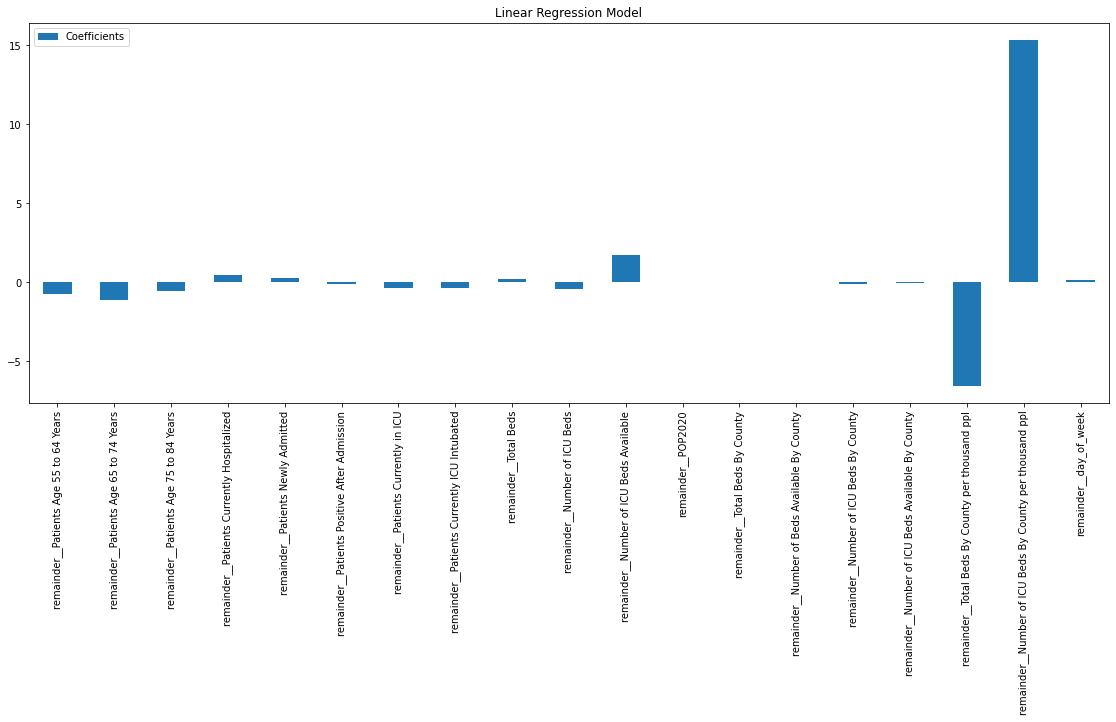

In [93]:
import matplotlib.pyplot as plt
coefs = pd.DataFrame(
   reg.coef_,
   columns=['Coefficients'], index=transformer.get_feature_names_out()
)

coefs.plot(kind='bar', figsize=(25, 7))
plt.title('Linear Regression Model')
# plt.ayhline(0, color='.5')
plt.subplots_adjust(left=.3)

## ROC CURVE

In [32]:
# from sklearn.metrics import roc_auc_score, roc_curve
# import matplotlib.pyplot as plt

# y_probs = reg(X_test)
# y_probs_positives = y_probs[:,1]

# #Calc fpr,tpr,thresholds
# fpr,tpr,thresholds = roc_curve(y_test,y_probs_positives)
# fpr,tpr,thresholds


# def plot_roc_curve(fpr,tpr):
#   plt.plot(fpr,tpr,color="orange", label="ROC")
#   plt.xlabel("False posiive rate (fpr)")
#   plt.ylabel("True positive rate (tpr)")
#   plt.title("ROC")
#   plt.legend()
#   plt.show()

# plot_roc_curve(fpr,tpr)
# roc_auc_score(y_test,y_probs_positives)

AttributeError: 'LinearRegression' object has no attribute 'predict_proba'